In [33]:
### Print not only the last line in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
import sys
sys.path.insert(0,'/afs/cern.ch/user/a/anpotreb/top/JERC/JMECoffea')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from coffea import util

In [35]:
add_tag = '_QCD-JME-leading3jets' #-etaAut18'
# add_tag = '_QCD-JME' #-etaAut18'

tag_full = '_L5'+add_tag
outname = '../out/CoffeaJERCOutputs'+tag_full+'.coffea'
output = util.load(outname)

In [36]:
if "Herwig-QCD" in add_tag:
    dataset_list_file = '../fileNames/xsecs_QCD_Herwig.txt'
    with open(dataset_list_file) as f:
        lines = f.readlines()
    lines_split = [line.split() for line in lines]
    file_dict = {lineii[0]: float(lineii[1]) for lineii in lines_split }
else:
    file_dict = 1

In [37]:
file_dict
file_dict2 = file_dict
file_dict2 = {
    "HT50to100": 56530.0,
    "HT100to200": 11370.0*0.95,
    "HT200to300": 883.5*1.1,
    "HT300to500": 259.6*0.93,
    "HT500to700": 23.63*1.06,
    "HT700to1000": 4.943*1.15,
    "HT1000to1500": 0.8013*1.35,
    "HT1500to2000": 0.06815*1.6,
    "HT2000toInf": 0.01245*1.75,
}

1

In [ ]:
# allkeys

In [38]:
def sum_subhist(output, hist_key, allkeys):
    new_hist = 0
    new_pt_hist = 0
    for sample_key in file_dict2.keys():
        response_hist = output[sample_key]['ptresponse'+hist_key]
        pt_hist = output[sample_key]['reco_pt_sumwx'+hist_key]
        hist_sum = response_hist.sum().value
        
        response_hist = response_hist/hist_sum*file_dict2[sample_key]
        new_hist = new_hist + response_hist
        pt_hist = pt_hist/hist_sum*file_dict2[sample_key]
        new_pt_hist = new_pt_hist + pt_hist
    return new_hist, new_pt_hist

output_orig = output
if 'Herwig-QCD' in add_tag:
    all_samples = [key[10:] for key in output[next(iter(output.keys()))].keys() if 'ptresponse_' in key]
    allkeys = set.union(*[set(output[key]) for key in output.keys()])
    result = {}
    for sample in all_samples:
        new_hist, new_pt_hist = sum_subhist(output, sample, allkeys)
        result['ptresponse'+sample] = new_hist
        result['reco_pt_sumwx'+sample] = new_pt_hist  
#     result = {key+sample: sum_subhist(output, sample, allkeys) for sample in all_samples for key in ['ptresponse', 'reco_pt_sumwx_']}
    output = result
else:
    try:
        output = output['QCD']
    except KeyError:
        output=output

In [39]:
for key in output.keys():
    if 'response' in key:
        response_key = key
        break

In [40]:
fine_etabins=False
one_bin=False
if fine_etabins==True:
    ptbins = np.array([15, 40, 150, 400, 4000, 10000])
    ptbins_c = (ptbins[:-1]+ptbins[1:])/2
    etabins = output[response_key].axes["jeteta"].edges #output['ptresponse'].axis('jeteta').edges()
elif one_bin==True:
    ptbins = np.array([15, 10000])
    ptbins_c = (ptbins[:-1]+ptbins[1:])/2
    etabins = np.array([-5, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5])
    etabins = np.array([etabins[0], 0, etabins[-1]])
#     etabins = np.array([etabins[3], 0, etabins[-4]])
else:
    ptbins = output[response_key].axes["pt_gen"].edges 
#     ptbins = ptbins[2:] #because there is a pt cut on pt gen and no point of fitting and plotting below that
    ptbins_c = output[response_key].axes['pt_gen'].centers
#     etabins = np.array([-5.191, -3.489, -3.139, -2.853,   -2.5, -2.322,  -1.93, -1.653, -1.305, -0.783,      0,  0.783,  1.305,  1.653,   1.93,  2.322,    2.5,  2.853,  3.139,  3.489, 5.191])
    etabins = np.array([-5.191, -3, -2.5, -1.3, 0, 1.3, 2.5, 3, 5.191])

### Square style

In [41]:
from pltStyle import pltStyle
pltStyle(style='paper')
plt.rcParams['figure.subplot.left'] = 0.162
plt.rcParams['figure.dpi'] = 150

In [42]:
plt.rcParams['figure.figsize'] = [3.7, 3.7]  #Latex text width =0.7*page width = 8.2 inches
#        plt.rcParams['figure.subplot.wspace'] = 0.33
plt.rcParams['figure.subplot.top'] = 0.87
plt.rcParams['figure.subplot.bottom'] = 0.16
plt.rcParams['figure.subplot.right'] = 0.97
plt.rcParams['figure.subplot.left'] = 0.15
# plt.rcParams['axes.prop_cycle'] = cols_cyc

In [43]:
all_samples = [key[10:] for key in output.keys() if 'ptresponse_' in key]

In [44]:
all_samples

['_b',
 '_c',
 '_u',
 '_d',
 '_s',
 '_g',
 '_bbar',
 '_cbar',
 '_ubar',
 '_dbar',
 '_sbar',
 '_untagged']

In [45]:
# output.keys()

In [46]:
# (output['ptresponse_u']+output['ptresponse_ubar']+output['ptresponse_d']+output['ptresponse_dbar'])[:,sum,sum]
q_hist = (output['ptresponse_u']+output['ptresponse_ubar']+output['ptresponse_d']+output['ptresponse_dbar']+output['ptresponse_s']+output['ptresponse_sbar'])[:,sum,sum]
g_hist = (output['ptresponse_g'])[:,sum,sum]
b_hist = (output['ptresponse_b']+output['ptresponse_bbar'])[:,sum,sum]
c_hist = (output['ptresponse_c']+output['ptresponse_cbar'])[:,sum,sum]
untagged_hist = (output['ptresponse_untagged'])[:,sum,sum]

# calculate all
combine_samples = [samp[1:] for samp in all_samples]

all_responses = {samp:output['ptresponse_'+samp] for samp in combine_samples}
all_hist = sum(all_responses.values())[:,sum,sum]

In [47]:
# all_responses.keys()

In [48]:
# import hist.hist
# blah = (output['ptresponse_g'])[hist.loc(30):,sum,sum]
# blah1 = (output['ptresponse_b']+output['ptresponse_bbar'])[hist.loc(30):,sum,sum]

In [49]:
# blah.sum().value**2/blah.sum().variance

# blah1.sum().value**2/blah1.sum().variance

In [50]:
# (q_hist.values()**2/q_hist.variances()+g_hist.values()**2/g_hist.variances()+b_hist.values()**2/b_hist.variances()+c_hist.values()**2/c_hist.variances()+untagged_hist.values()**2/untagged_hist.variances())/allhistval


Saving plot with the name =  ../fig/fractions/fraction_L5_QCD-JME-leading3jets


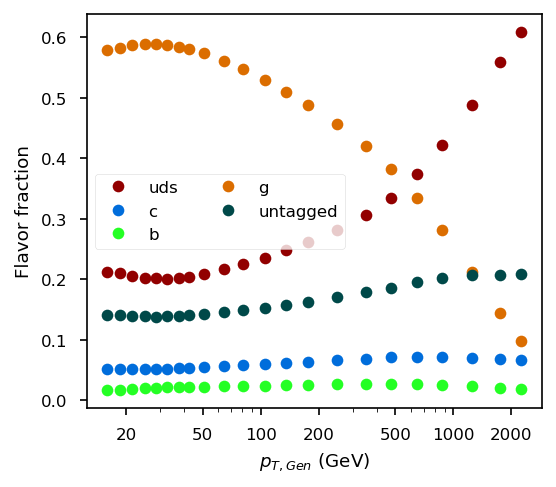

In [52]:
# allhistval = all_hist.values()**2/all_hist.variances()
# allhistval[allhistval==0] = np.nan
allhistval = (q_hist.values()**2/q_hist.variances()+g_hist.values()**2/g_hist.variances()+b_hist.values()**2/b_hist.variances()+c_hist.values()**2/c_hist.variances()+untagged_hist.values()**2/untagged_hist.variances())
# allhistval = (q_hist.values()**2/q_hist.variances()+g_hist.values()**2/g_hist.variances()+b_hist.values()**2/b_hist.variances()+c_hist.values()**2/c_hist.variances())


plot_range = range(0, len(ptbins_c)-6)
# ptbins_c[plot_range]
ptbins_c_plot = ptbins_c[plot_range]
q_frac = (q_hist.values()**2/q_hist.variances()/allhistval)[plot_range]
g_frac = (g_hist.values()**2/g_hist.variances()/allhistval)[plot_range]
b_frac = (b_hist.values()**2/b_hist.variances()/allhistval)[plot_range]
c_frac = (c_hist.values()**2/c_hist.variances()/allhistval)[plot_range]
unt_frac = (untagged_hist.values()**2/untagged_hist.variances()/allhistval)[plot_range]

fig, ax = plt.subplots()
ax.plot(ptbins_c_plot, q_frac, 'o', label="uds")
ax.plot(ptbins_c_plot, c_frac, 'o', label="c")
ax.plot(ptbins_c_plot, b_frac, 'o', label="b")
ax.plot(ptbins_c_plot, g_frac, 'o', label="g")
ax.plot(ptbins_c_plot, unt_frac, 'o', label="untagged")
ax.set_xscale('log')
ax.set_xlabel('$p_{T,Gen}$ (GeV)')
ax.set_ylabel("Flavor fraction")

xlims = ax.get_xlim()

ax.set_xticks([])
ax.set_xticks([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
leg1 = ax.legend(ncol=2)

ax.set_xlim(xlims)

import os
if not os.path.exists("../fig/fractions"):
    os.mkdir("../fig/fractions")
    
fig_name = '../fig/fractions/fraction'+tag_full
print("Saving plot with the name = ", fig_name)
plt.savefig(fig_name+'.pdf');
plt.savefig(fig_name+'.png');

# ptbins_c
1;